In [1]:
import pandas as pd
from textblob import TextBlob
import glob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import itertools
import collections
import shifterator as rs

In [17]:
dataset_names={0:"crisislex",1:"crisisnlp_crisismmd",2:"news_notNews",3:"Covid_WNUT", 4:"crisisnlp_Sandy_Japolin", 5:"crisisnlp_19Crisis"}

In [2]:
all_files = glob.glob("./dataset_cleaning/*.pkl")
all_files.sort()
datasets = []

for filename in all_files:
    print(filename)
    df = pd.read_pickle(filename)
    datasets.append(df)



./dataset_cleaning/dataset1Cleaned.pkl
./dataset_cleaning/dataset2Cleaned.pkl
./dataset_cleaning/dataset3Cleaned.pkl
./dataset_cleaning/dataset4Cleaned.pkl
./dataset_cleaning/dataset5Cleaned.pkl
./dataset_cleaning/dataset6Cleaned.pkl


In [3]:
datasets[0]

,id,Informativeness,text
0,211040709124440064,0,#Intern #US #TATTOO #Wisconsin #Ohio #NC #PA #...
1,210864180218167296,0,Get in on the fun every Thursday with the @csi...
2,211157222699433985,0,Welcome to our newest STUDENTathlete- Reagan B...
3,211162553659830272,0,Denver Post: #Colorado governor signs bill cre...
4,211216962162933761,0,Pretty sure I'm going to live in Manitou Sprin...
...,...,...,...
27814,334509601988956162,0,@leavingthedock_ I'm in west Texas right now w...
27815,334520955965693953,0,"""how many fertilizer plants are there in texas..."
27816,334682363592318976,0,#SEC West Baseball Standings:\n1. LSU\n2. Arka...
27817,334754452877746176,0,"RT @mountain_goats: Quick somebody ask me ""are..."


I learned how to clean the review text data and calculate frequencies using [this tutorial](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/). The next few cells will clean and prepare the data by removing punctuation, stop words, change everything to lower case, etc so we can calculate frequencies.

In [5]:
# We will want to remove stop words
stop_words = set(stopwords.words('english'))

In [6]:
def remove_punctuation(txt):
    """Replace URLs and other punctuation found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with URLs and punctuation removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [7]:
from nltk import bigrams
def clean_text_bigram(txt):
    """Removes punctuation, changes to lowercase, removes
        stopwords, removes "animal" and "crossing", and
        calculates word frequencies.

    Parameters
    ----------
    txt : string
        A text string that you want to clean.

    Returns
    -------
    Words and frequencies
    """
    
    tmp = [remove_punctuation(t) for t in txt]
    tmp = [t.lower().split() for t in tmp]
    
    tmp = [[w for w in t if not w in stop_words]
              for t in tmp]

    tmp= list(map(lambda x: list(bigrams(x)), tmp))
    tmp = [list(map(lambda x: ' '.join(x),b))  for b in tmp]

    tmp = list(itertools.chain(*tmp))
    tmp = collections.Counter(tmp)
        
    return tmp

In [8]:
def clean_text(txt):
    """Removes punctuation, changes to lowercase, removes
        stopwords, removes "animal" and "crossing", and
        calculates word frequencies.

    Parameters
    ----------
    txt : string
        A text string that you want to clean.

    Returns
    -------
    Words and frequencies
    """
    
    tmp = [remove_punctuation(t) for t in txt]
    tmp = [t.lower().split() for t in tmp]
    
    tmp = [[w for w in t if not w in stop_words]
              for t in tmp]
    
    tmp = list(itertools.chain(*tmp))
    tmp = collections.Counter(tmp)
        
    return tmp

Dataset  crisislex


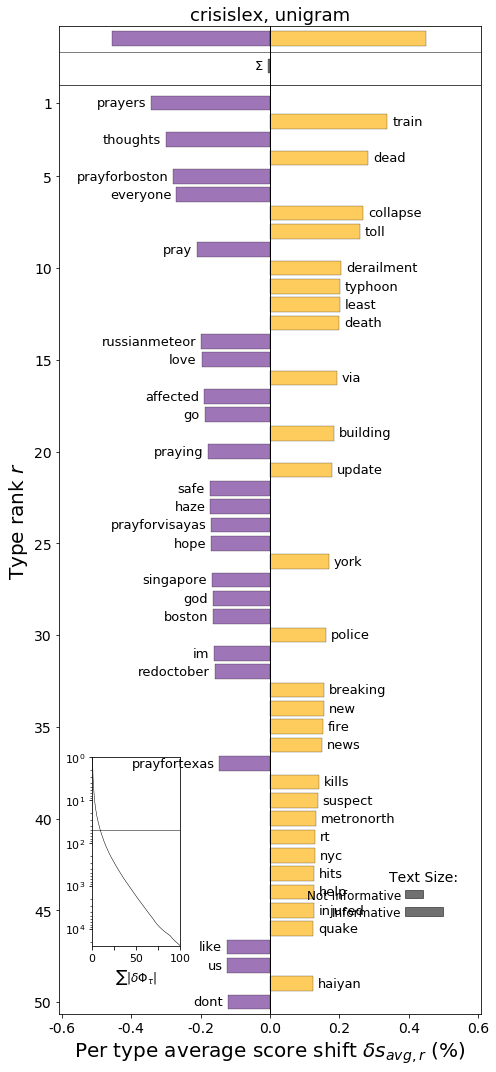

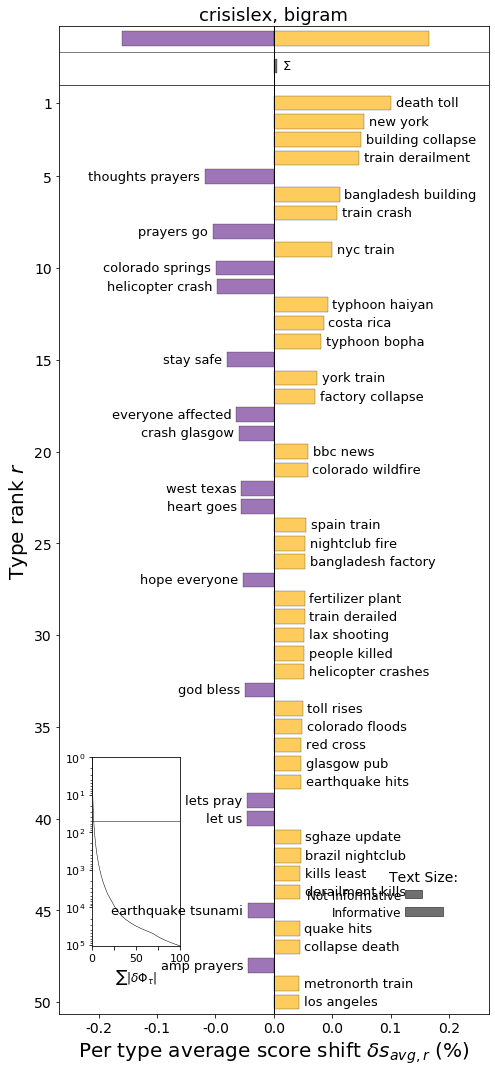

Dataset  crisisnlp_crisismmd


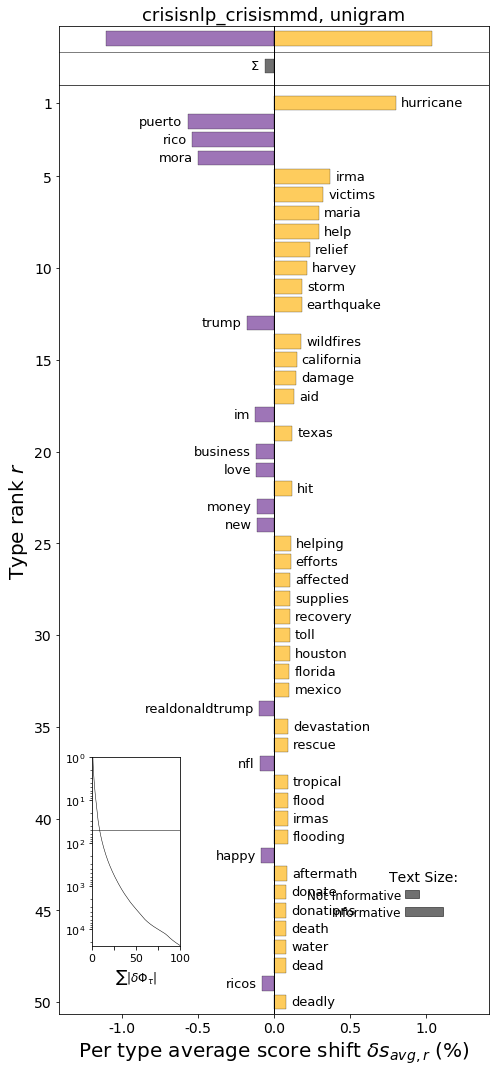

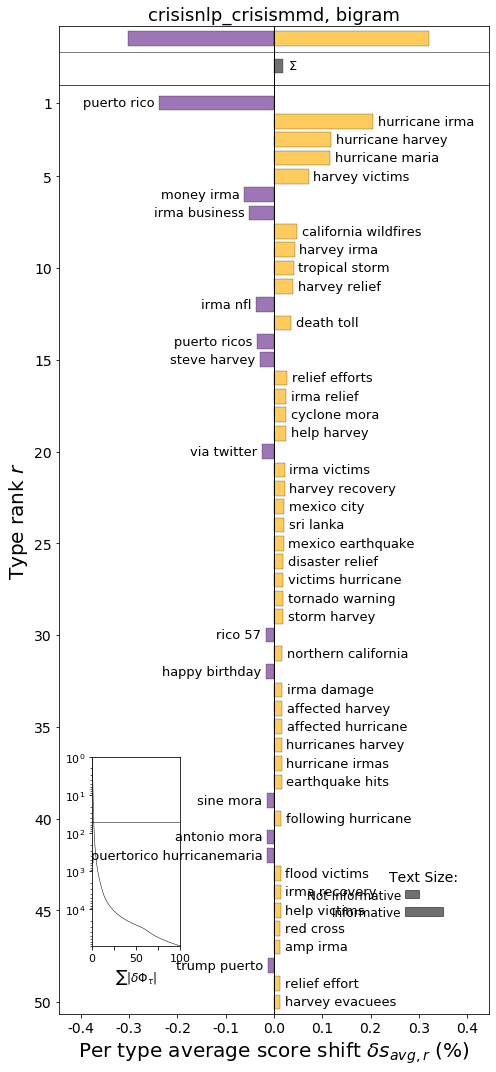

Dataset  news_notNews


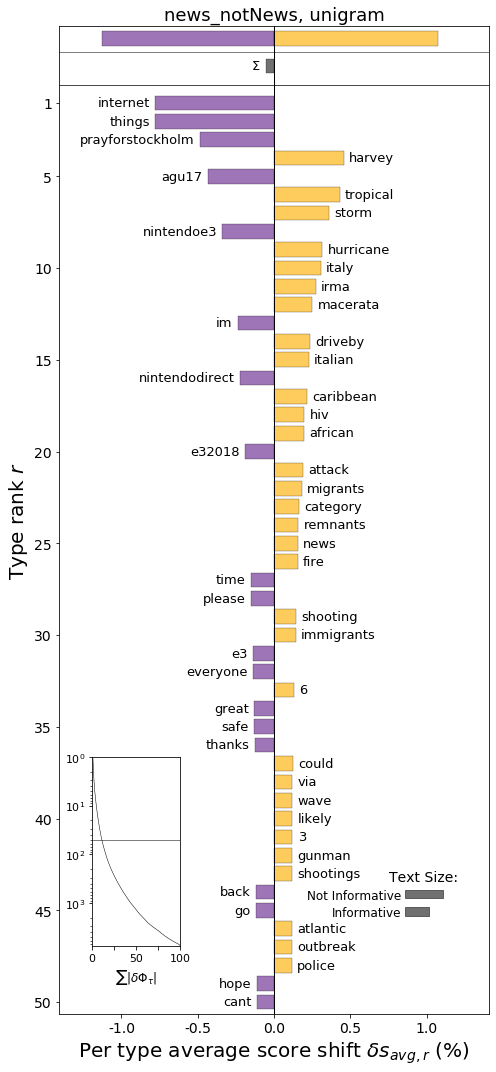

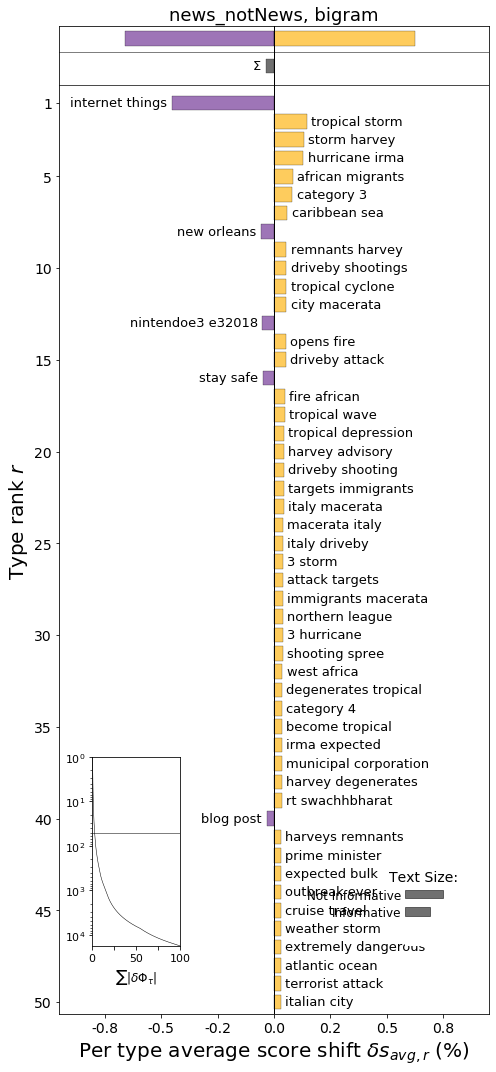

Dataset  Covid_WNUT


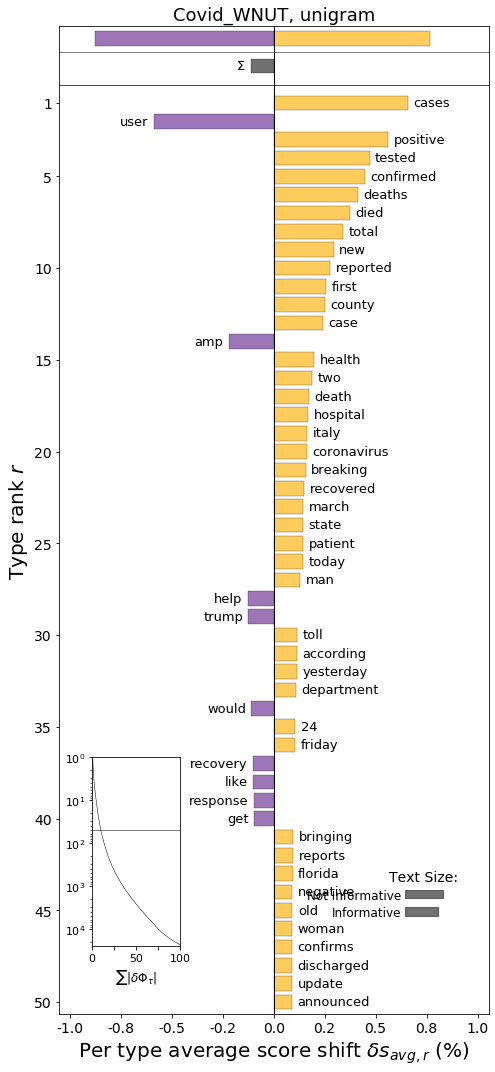

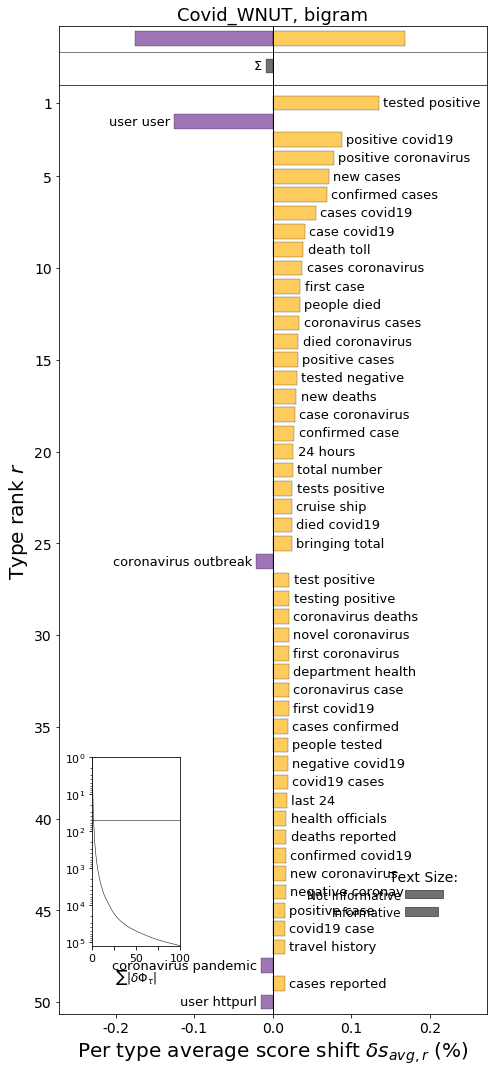

Dataset  crisisnlp_Sandy_Japolin


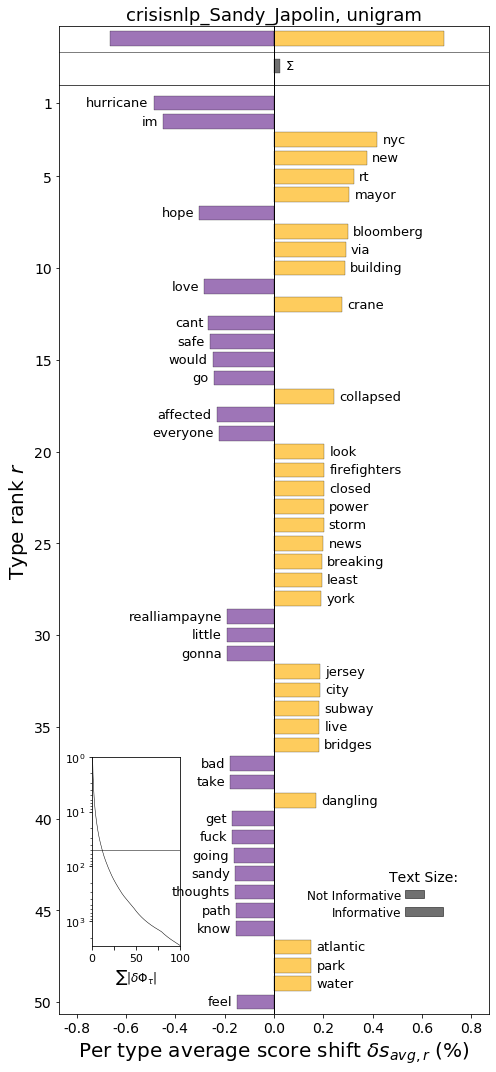

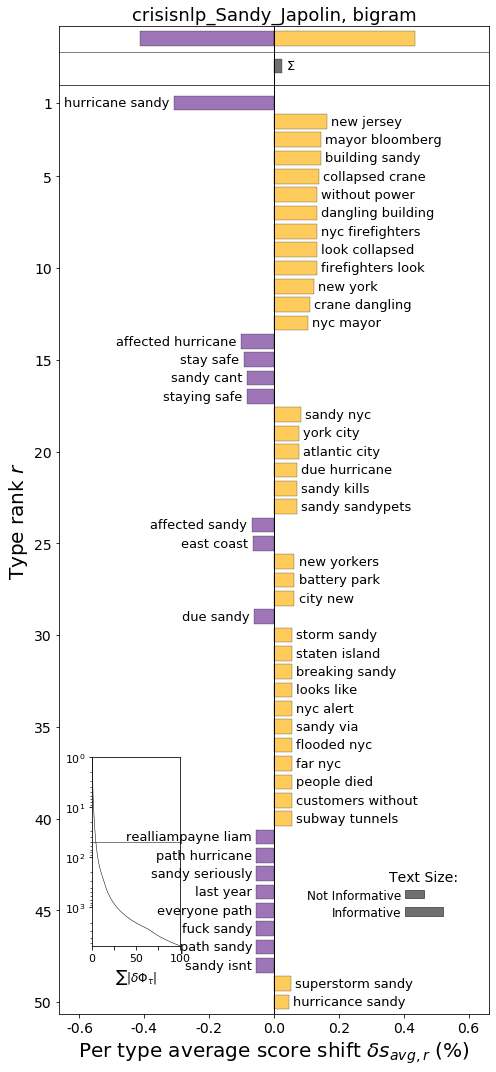

Dataset  crisisnlp_19Crisis


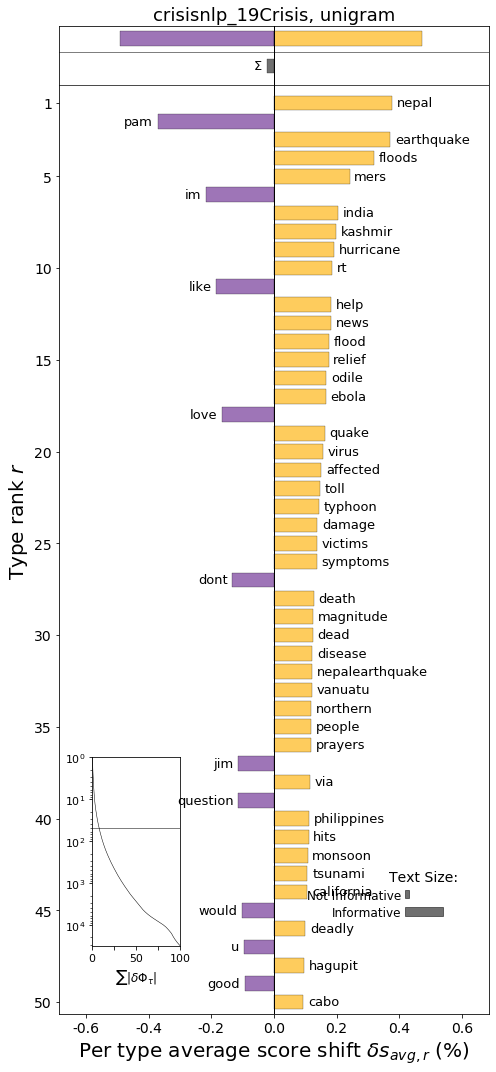

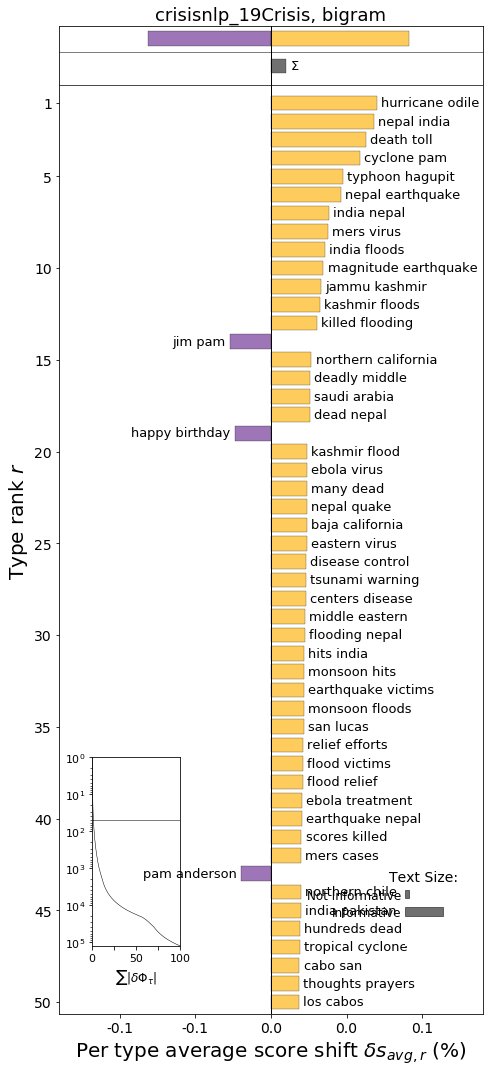

In [19]:
for i, df in enumerate(datasets):
    
    print("Dataset ", dataset_names[i])
    texts_neg=df[df["Informativeness"]==0]
    texts_pos=df[df["Informativeness"]==1]

    texts = df['text'].tolist()
    texts_neg = texts_neg['text'].tolist()
    texts_pos = texts_pos['text'].tolist()
    
    clean_texts_neg = clean_text(texts_neg)
    clean_texts_pos = clean_text(texts_pos)
    
    clean_texts_bigram_neg = clean_text_bigram(texts_neg)
    clean_texts_bigram_pos = clean_text_bigram(texts_pos)
    
    entropy_shift_unigram = rs.EntropyShift(clean_texts_neg,
                                clean_texts_pos,
                                base=2)
    entropy_shift_unigram.get_shift_graph(system_names = ['Not Informative', 'Informative'], title='{}, unigram'.format(dataset_names[i]), filename='./shifts/{}_unigram.png'.format(dataset_names[i]))
    
    entropy_shift_bigram = rs.EntropyShift(clean_texts_bigram_neg,
                                clean_texts_bigram_pos,
                                base=2)
    entropy_shift_bigram.get_shift_graph(system_names = ['Not Informative', 'Informative'], title='{}, bigram'.format(dataset_names[i]), filename='./shifts/{}_bigram.png'.format(dataset_names[i]))


In [ ]:
df= datasets[0]

texts_neg=df[df["Informativeness"]==0]
texts_pos=df[df["Informativeness"]==1]

texts = df['text'].tolist()
texts_neg = texts_neg['text'].tolist()
texts_pos = texts_pos['text'].tolist()

In [9]:
# Clean up the review texts
clean_texts_neg = clean_text(texts_neg)
clean_texts_pos = clean_text(texts_pos)

In [10]:
clean_texts_bigram_neg = clean_text_bigram(texts_neg)
clean_texts_bigram_pos = clean_text_bigram(texts_pos)

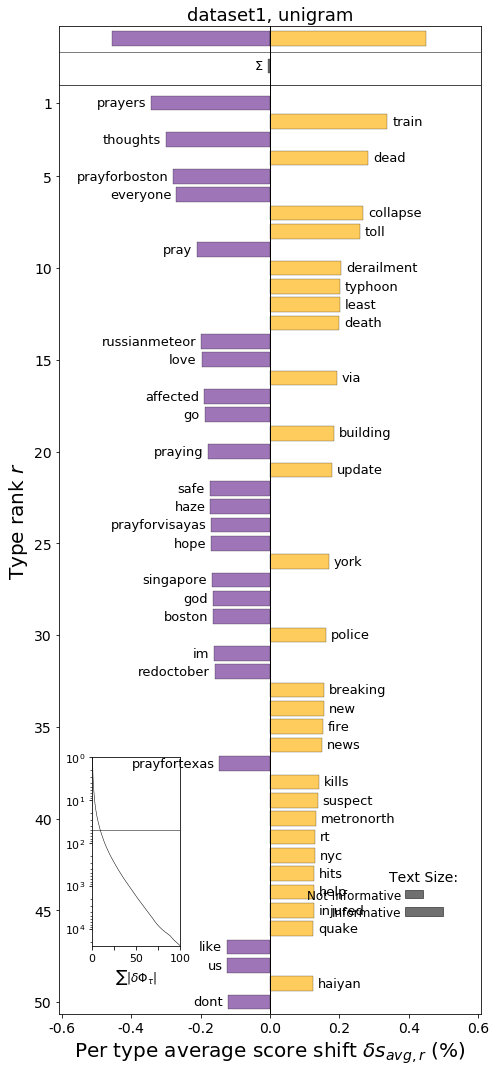

In [16]:
entropy_shift = rs.EntropyShift(clean_texts_neg,
                                clean_texts_pos,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['Not Informative', 'Informative'], title='{}, unigram'.format("dataset1"), filename='./test.png') 


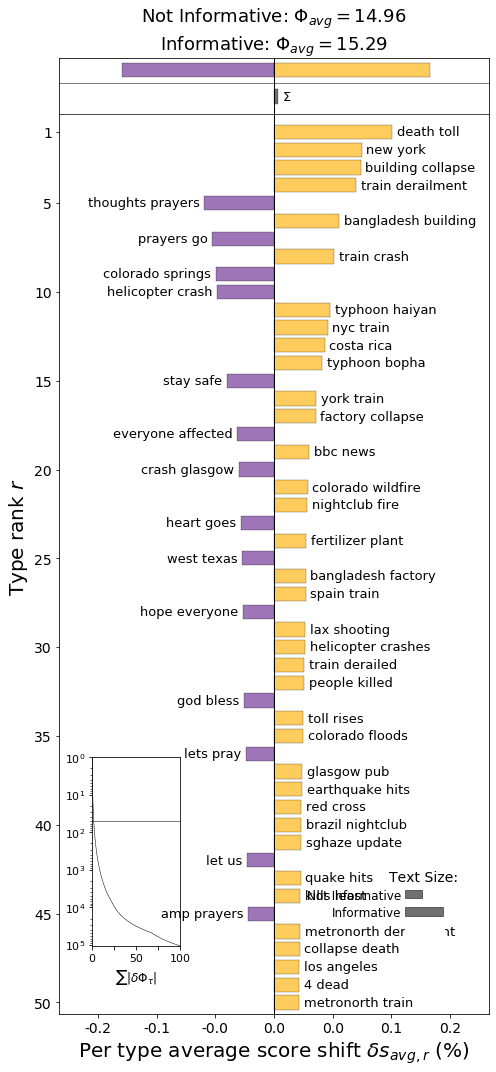

In [99]:
entropy_shift = rs.EntropyShift(clean_texts_bigram_neg,
                                clean_texts_bigram_pos,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['Not Informative', 'Informative']) 